<a class="anchor" id="0.1"></a>
# **Table of Contents**
1. [Introduction](#1)
2. [Business Understanding](#2)
3. [Data Understanding](#3)
4. [Data Preperation](#4)
5. [Modeling](#5)
6. [Evaluation](#6)

# **1. Introduction** <a class="anchor" id="1"></a>
[Table of Contents](#0.1)

This notebook will explore k Means Clustering by going through the CRISP-DM process. The goal is to gain insight of how to use k Means clustering in Python and its usefulness. This notebook will borrow from the [Clustering Penguins Species (K-means Clustering)](https://www.kaggle.com/code/youssefaboelwafa/clustering-penguins-species-k-means-clustering) by Yussef Aboelwafa which uses the same dataset. However, it will be structured to follow the CRISP-DM process. Any changes will be outlined in the changelog.

# **2. Business Understanding** <a class="anchor" id="2"></a>
[Table of Contents](#0.1)

The dataset I will be using for this notebook is the [Clustering Penguins Species](https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species/data) dataset. Each record represents a penguin with differing attributes about the penguin.

For each penguin, there are the following labels:
- culmen_length_mm
- culmen_depth_mm
- flipper_length_mm
- body_mass_g
- sex

Because k Means is unsupervised learning, we will not be picking a label to make a prediction. Rather, we will be attempting to group penguins with like characteristics to separate them into possible differing species.

# **3. Data Understanding** <a class="anchor" id="3"></a>
[Table of Contents](#0.1)

We will now explore our dataset and understand the type of data we are working with. First we must import our dataset into python.

In [1]:
# This library will help us access our file
try:
    import os
except:
    !pip install os
    import os
    
# This library is for data processing, and CSV file I/O
try:
    import pandas as pd
except:
    !pip install pandas
    import pandas as pd

In [2]:
current_working_directory = os.getcwd()
file = r'\input\penguins.csv' #this directory may differ for you
data = current_working_directory + file

df = pd.read_csv(data, header=0,sep=',')

Now that we've imported our data, we can explore it to gain insights.

In [3]:
df.shape

(344, 5)

This tells us there are 344 instances, and 5 attributes in our dataset, which matches with our business understanding.

In [4]:
df.head() # preview the top 5 rows

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


We can see already that there are missing values. This means that during our Data Preperation phase, we can expect to have to handle for these missing values.

### Explore Categorical Variables

In [6]:
# identify categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print(f'There are {len(categorical)} categorical variables\n')
print(f'The categorical variables are: {categorical}')

There are 1 categorical variables

The categorical variables are: ['sex']


### Explore Numerical Variables

In [7]:
# identify numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print(f'There are {len(numerical)} numerical variables\n')
print(f'The numerical variables are: {numerical}')

There are 4 numerical variables

The numerical variables are: ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']


# **4. Data Preperation** <a class="anchor" id="4"></a>
[Table of Contents](#0.1)

During the Data Understanding phase, we noticed there are some missing values. In this section, we ewill handle the missing data.

In [8]:
df[numerical].isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
dtype: int64

Here we can see there are null values for each category. Next we will remove all null values and check again.

In [9]:
df.dropna(inplace=True) # remove all null values from the dataframe
df[numerical].isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [10]:
%matplotlib inline 

# This library is for plotting our data in a chart
try:
    import matplotlib.pyplot as plt
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt

We can do the same with our categorical values.

In [11]:
df[categorical].isnull().sum()

sex    0
dtype: int64

We can see that there are no null values for the categorical variable. However, there may be unexpected values. Let's check the counts for each value. We should expect to see a count for MALE and FEMALE values.

In [12]:
for var in categorical:
    print(df[var].value_counts())

sex
MALE      169
FEMALE    165
.           1
Name: count, dtype: int64


We can see there is a third value in the dataset. Because the sex should be binary, we should remove it from our datasaet.

In [13]:
df = df[df.sex != '.']
for var in categorical:
    print(df[var].value_counts())

sex
MALE      169
FEMALE    165
Name: count, dtype: int64


We should also check our data for possible outliers. We can do this by sorting our dataframe and looking at the upper and lower values

In [14]:
df.sort_values('culmen_length_mm')

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
142,32.1,15.5,188.0,3050.0,FEMALE
98,33.1,16.1,178.0,2900.0,FEMALE
70,33.5,19.0,190.0,3600.0,FEMALE
92,34.0,17.1,185.0,3400.0,FEMALE
18,34.4,18.4,184.0,3325.0,FEMALE
...,...,...,...,...,...
335,55.1,16.0,230.0,5850.0,MALE
215,55.8,19.8,207.0,4000.0,MALE
321,55.9,17.0,228.0,5600.0,MALE
169,58.0,17.8,181.0,3700.0,FEMALE


In [15]:
df.sort_values('culmen_depth_mm')

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
244,42.9,13.1,215.0,5000.0,FEMALE
220,46.1,13.2,211.0,4500.0,FEMALE
268,44.9,13.3,213.0,5100.0,FEMALE
228,43.3,13.4,209.0,4400.0,FEMALE
225,46.5,13.5,210.0,4550.0,FEMALE
...,...,...,...,...,...
14,34.6,21.1,-132.0,4400.0,MALE
35,39.2,21.1,196.0,4150.0,MALE
49,42.3,21.2,191.0,4150.0,MALE
13,38.6,21.2,191.0,3800.0,MALE


In [16]:
df.sort_values('flipper_length_mm')

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
14,34.6,21.1,-132.0,4400.0,MALE
28,37.9,18.6,172.0,3150.0,FEMALE
20,37.8,18.3,174.0,3400.0,FEMALE
122,40.2,17.0,176.0,3450.0,FEMALE
31,37.2,18.1,178.0,3900.0,MALE
...,...,...,...,...,...
285,49.8,16.8,230.0,5700.0,MALE
295,48.6,16.0,230.0,5800.0,MALE
221,50.0,16.3,230.0,5700.0,MALE
283,54.3,15.7,231.0,5650.0,MALE


Looking at the output of `flipper_length_mm`, it seems there are a few ouliers. Namely -132 and 5000. we should remove these outliers as to not affect our results.

In [17]:
df = df[df.flipper_length_mm > 0]
df = df[df.flipper_length_mm < 250]
df.sort_values('flipper_length_mm')

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
28,37.9,18.6,172.0,3150.0,FEMALE
20,37.8,18.3,174.0,3400.0,FEMALE
122,40.2,17.0,176.0,3450.0,FEMALE
158,46.1,18.2,178.0,3250.0,FEMALE
98,33.1,16.1,178.0,2900.0,FEMALE
...,...,...,...,...,...
333,51.5,16.3,230.0,5500.0,MALE
335,55.1,16.0,230.0,5850.0,MALE
253,59.6,17.0,230.0,6050.0,MALE
295,48.6,16.0,230.0,5800.0,MALE


In [18]:
df.sort_values('body_mass_g')

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
190,46.9,16.6,192.0,2700.0,FEMALE
64,36.4,17.1,184.0,2850.0,FEMALE
58,36.5,16.6,181.0,2850.0,FEMALE
174,43.2,16.6,187.0,2900.0,FEMALE
54,34.5,18.1,187.0,2900.0,FEMALE
...,...,...,...,...,...
299,45.2,16.4,223.0,5950.0,MALE
337,48.8,16.2,222.0,6000.0,MALE
297,51.1,16.3,220.0,6000.0,MALE
253,59.6,17.0,230.0,6050.0,MALE


Before we start modeling our k Means cluster, we want to determine the optimal amount of clusters. One way to do this is using the **elbow method**.

The **elbow method** is a graphical representation of finding the optimal 'k' in clustering.

To perform the elbow method, we need to scale our values so that they are appropriately weighted. To do so, we will use the `StandardScaler` from sklearn's `preprocessing`

Before we can do so, we need to convert our sex from a string to a boolean representation

In [19]:
df['ismale'] = df['sex'].map({'MALE': True, 'FEMALE': False})
df.drop('sex', axis=1, inplace=True)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,ismale
0,39.1,18.7,181.0,3750.0,True
1,39.5,17.4,186.0,3800.0,False
2,40.3,18.0,195.0,3250.0,False
4,36.7,19.3,193.0,3450.0,False
5,39.3,20.6,190.0,3650.0,True


In [20]:
try:
    from sklearn.preprocessing import StandardScaler
except:
    !pip install sklearn
    from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
df_scaled = pd.DataFrame(data=X, columns=df.columns)
df_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,ismale
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,0.993994


After scaling our values, we can see that they have been converted to weight values. We have one final step we need to perform before we can perform the elbow method: **Principal Component Analysis**.

The code below is from [Clustering Penguins Species (K-means Clustering)](https://www.kaggle.com/code/youssefaboelwafa/clustering-penguins-species-k-means-clustering)

In [22]:
try:
    from sklearn.decomposition import PCA
except:
    !pip install sklearn
    from sklearn.decomposition import PCA

In [23]:
# from 
pca = PCA(n_components=None)
dfx_pca = pca.fit(df_scaled)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(df_scaled)
n_components

2

In [24]:
try:
    from sklearn.cluster import KMeans
except:
    !pip install sklearn
    from sklearn.cluster import KMeans

C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

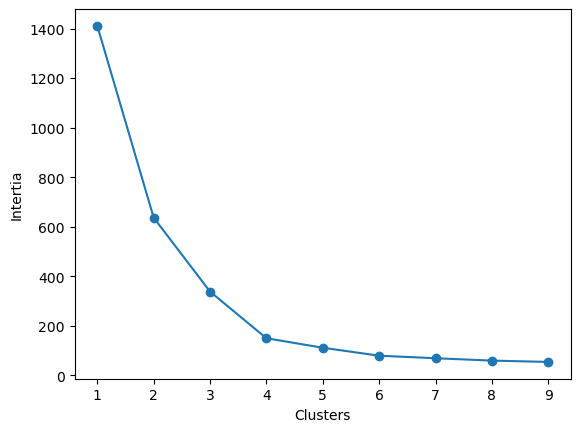

In [25]:
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1,10), inertia, marker='o')
plt.xlabel("Clusters")
plt.ylabel("Intertia")
plt.show()

Based on the graph, we can see that the elbow is at 4, which is the optimal amount of clusters we should use.

# **5. Modeling** <a class="anchor" id="5"></a>
[Table of Contents](#0.1)

Now that we know the optimal amount of clusters, we can train our k means model.

C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


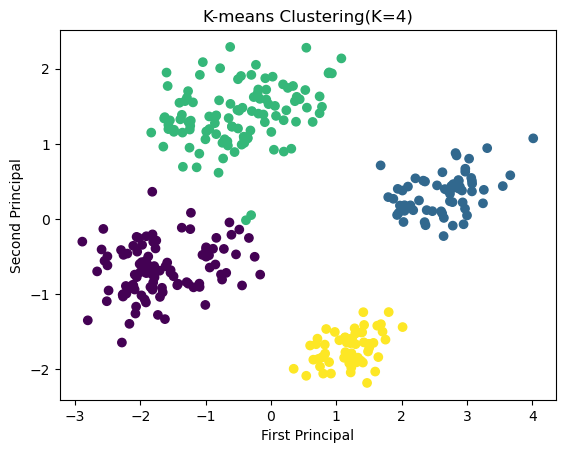

In [26]:
kMeans = KMeans(n_clusters=4).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:,1], c=kMeans.labels_)
plt.xlabel("First Principal")
plt.ylabel("Second Principal")
plt.title("K-means Clustering(K=4)")
plt.show()

# **6. Evaluation** <a class="anchor" id="6"></a>
[Table of Contents](#0.1)

Because there is no known target variable, we cannot compare our models success to an expected outcome. However, we can visually confirm form the scatter plot chart that our points are fairly well clustered with a few miss-classifications.